In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/complete-reliance-stocks-dataset/RELIANCE.NS_1973-05-08_2025-03-01.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet

In [4]:
df=pd.read_csv('/kaggle/input/complete-reliance-stocks-dataset/RELIANCE.NS_1973-05-08_2025-03-01.csv')

**Understanding your Data**

After loading data Lets break down meaning for each and every column for better understanding 

date: The trading date — when the stock data was recorded. (Right now it shows a timestamp, but we can convert it to just the date.)

open: The stock’s price at the start of the trading day.

high: The highest price the stock reached during the day.

low: The lowest price the stock fell to during the day.

close: The stock’s price at the end of the trading day — often used in analysis and forecasting.

adj_close (Adjusted Close): The closing price adjusted for dividends, stock splits, and other factors — gives a clearer long-term view of stock performance.

volume: The total number of shares traded during the day — a measure of market activity.

In [5]:
df.head()

,date,open,high,low,close,adj_close,volume
0,1996-01-01 00:00:00+05:30,7.319124,7.358397,7.270925,7.345901,3.353593,104121369
1,1996-01-02 00:00:00+05:30,7.328050,7.363753,7.235222,7.288776,3.327513,168743308
2,1996-01-03 00:00:00+05:30,7.408381,7.745775,7.328050,7.344116,3.352778,209323879
3,1996-01-04 00:00:00+05:30,7.274495,7.297702,7.178097,7.276280,3.321809,216900264
4,1996-01-05 00:00:00+05:30,7.247718,7.247718,7.163816,7.226296,3.298990,166708467


**Checking the Datatypes of each column**

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       7324 non-null   object 
 1   open       7324 non-null   float64
 2   high       7324 non-null   float64
 3   low        7324 non-null   float64
 4   close      7324 non-null   float64
 5   adj_close  7324 non-null   float64
 6   volume     7324 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 400.7+ KB


**Verifying Null values**

In [7]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [10]:
df.isna().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

**As Per the above observation the Dataset is completely free from null and NAN values**


**Converting Date into Date Datatype**

In [12]:
df['date']=pd.to_datetime(df['date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   date       7324 non-null   datetime64[ns, UTC+05:30]
 1   open       7324 non-null   float64                  
 2   high       7324 non-null   float64                  
 3   low        7324 non-null   float64                  
 4   close      7324 non-null   float64                  
 5   adj_close  7324 non-null   float64                  
 6   volume     7324 non-null   int64                    
dtypes: datetime64[ns, UTC+05:30](1), float64(5), int64(1)
memory usage: 400.7 KB


In [14]:
df['date_year']=df['date'].dt.year

In [15]:
df['date_month_no']=df['date'].dt.month

In [16]:
df['date_month_name']=df['date'].dt.month_name()

In [17]:
df['date_month_name']=df['date'].dt.month_name()

In [18]:
df['date_month_name']

0        January
1        January
2        January
3        January
4        January
          ...   
7319    February
7320    February
7321    February
7322    February
7323    February
Name: date_month_name, Length: 7324, dtype: object

In [20]:
df['date_day']=df['date'].dt.day

In [21]:
df['date_day_name']=df['date'].dt.day_name()

In [24]:
df_2024=df[df['date_year']==2024]

In [25]:
df_2024.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume',
       'date_year', 'date_month_no', 'date_month_name', 'date_day',
       'date_day_name'],
      dtype='object')

**Analysing The Pattern of ClosingnPrice as per Date**

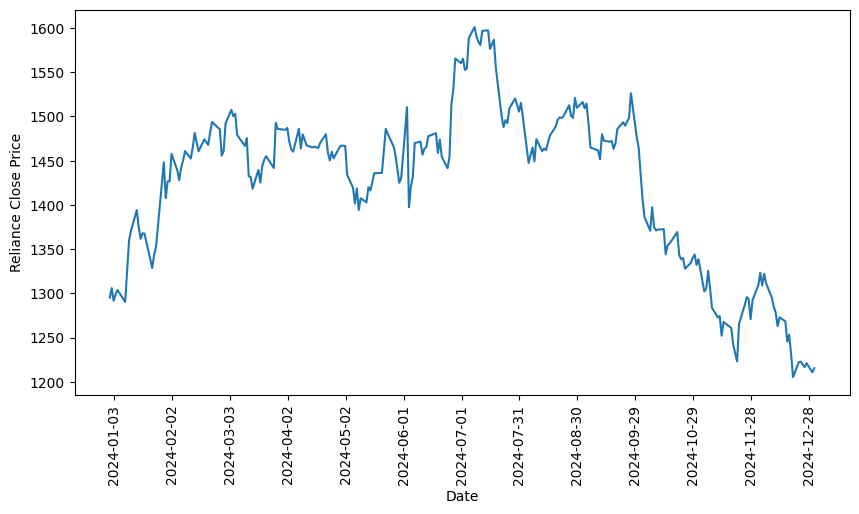

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df_2024['date'],df_2024['close'])

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Reliance Close Price')
plt.show()

**Evaluating 50 day and 200 day moving average[MA]**
as they are   are very  important in stock prediction because they help spot trends and potential shifts in market behavior.
50-day moving average (Short-term):

Captures the short- to mid-term trend of a stock.

Reacts faster to price changes — good for identifying momentum and quick shifts.

Often used by traders to spot buying or selling opportunities.


200-day moving average (Long-term):

Reflects the long-term trend of the stock.

Smoother line — filters out short-term noise and shows the bigger picture.

Helps identify bullish or bearish markets:

If the price stays above the 200-day MA, it’s seen as an uptrend.

If it stays below, it’s seen as a downtrend.

In short:

50-day MA = Current momentum
200-day MA = Long-term trend


In [27]:
df_2024['MA_50'] = df['close'].rolling(window=50).mean()  # 50-day moving average
df_2024['MA_200'] = df['close'].rolling(window=200).mean() #200-day moving average

<ipython-input-27-c2b8c8f9ad4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['MA_50'] = df['close'].rolling(window=50).mean()  # 50-day moving average
<ipython-input-27-c2b8c8f9ad4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['MA_200'] = df['close'].rolling(window=200).mean() #200-day moving average


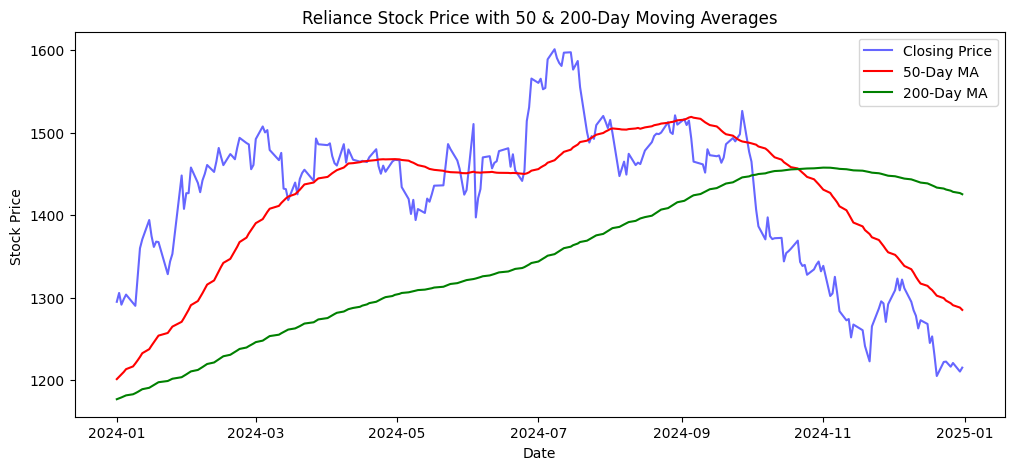

In [28]:
plt.figure(figsize=(12, 5))
plt.plot(df_2024['date'], df_2024['close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df_2024['date'], df_2024['MA_50'], label='50-Day MA', color='red')
plt.plot(df_2024['date'], df_2024['MA_200'], label='200-Day MA', color='green')
plt.xlabel("Date")
plt.ylabel("Stock Price ")
plt.title("Reliance Stock Price with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

In [29]:
monthly_avg=df_2024.groupby('date_month_no')['close'].mean()

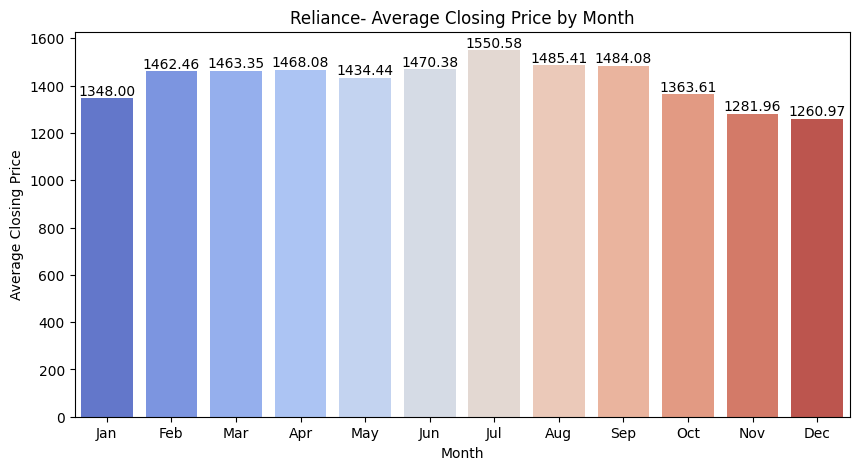

In [44]:
import seaborn as sns
plt.figure(figsize=(10, 5))
barplot=sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Reliance- Average Closing Price by Month")
plt.xticks(range(0, 12),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{bar.get_height():.2f}',  # Formatting to 2 decimal places
             ha='center', 
             va='bottom', 
             fontsize=10)

plt.show()

In [32]:
df_prophet_2024 = df_2024[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
df_prophet_2024['ds'] = pd.to_datetime(df_prophet_2024['ds']).dt.date

In [33]:
model = Prophet()

In [34]:
model.fit(df_prophet_2024)

06:08:48 - cmdstanpy - INFO - Chain [1] start processing
06:08:48 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future_dates = model.make_future_dataframe(periods=180)


In [36]:
forecast = model.predict(future_dates)


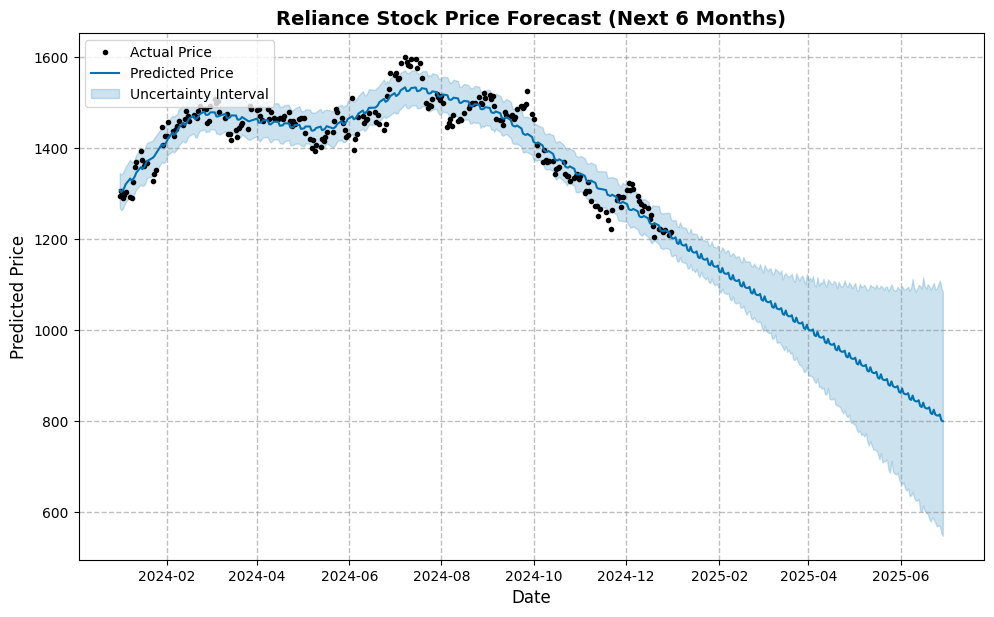

In [45]:
fig = model.plot(forecast)
plt.title("Reliance Stock Price Forecast (Next 6 Months)", fontsize=14, fontweight='bold')

plt.xlabel("Date", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
# Customizing colors and adding grid
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a legend for clarity
plt.legend(["Actual Price", "Predicted Price", "Uncertainty Interval"], loc='upper left')
plt.show()

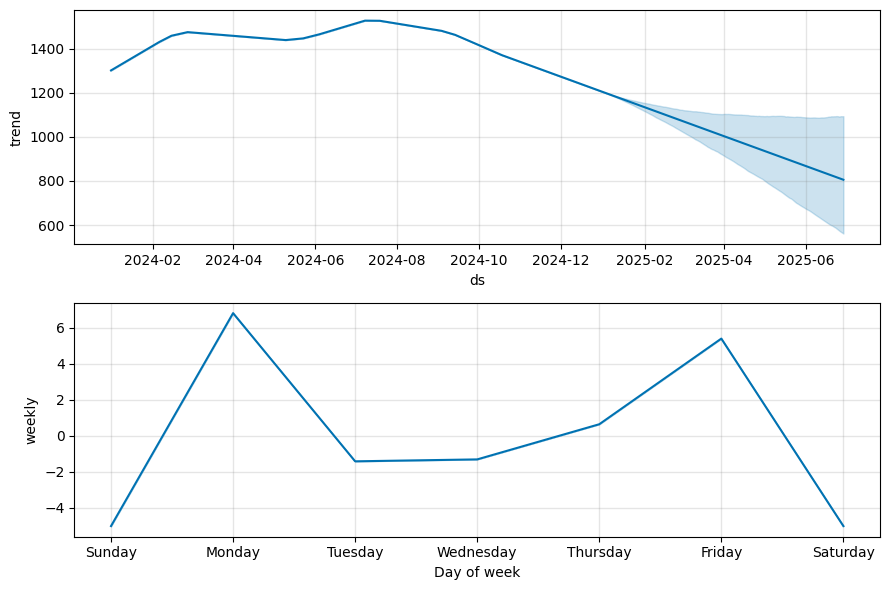

In [38]:
fig2 = model.plot_components(forecast)
plt.show()

**Storing dates and predicted outcomes for next six months in a data frame for easy readability of numbers**


In [40]:
predicted_prices = forecast[['ds', 'yhat']].rename(columns={'ds': 'date', 'yhat': 'predicted_price'})
predicted_prices.tail(10)

,date,predicted_price
416,2025-06-20,830.999719
417,2025-06-21,818.358965
418,2025-06-22,816.134552
419,2025-06-23,825.740612
420,2025-06-24,815.283460
421,2025-06-25,813.165722
422,2025-06-26,812.894249
423,2025-06-27,815.428806
424,2025-06-28,802.788052
425,2025-06-29,800.563639


**Reliance Stock Analysis & Forecast**

**Stock Performance:**

Reliance’s stock has shown noticeable fluctuations in recent months.
Moving averages highlight long-term trends and potential reversal points.
Stock Volatility:

Daily return analysis reveals short-term price volatility in several periods.
Monthly average prices show distinct patterns, indicating possible seasonal impacts.
Future Predictions:

Forecast suggests continued price dips with short-term fluctuations.
Prices are expected to move from ₹830 on June 20, 2025, down to ₹800 by June 29, 2025.
Conclusion:
Reliance’s stock shows growth potential but remains volatile. Investors should carefully monitor technical indicators and future forecasts for informed decision-making.